In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('C:\\Users\\arnab\\OneDrive\\Desktop\\git_project\\DS Projects\\Customer-Segmentation\\OnlineRetail.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().any().any()

False

In [10]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [11]:
df['Total_Revenue']=df['UnitPrice']*df['Quantity']
df['Total_Revenue'].describe()

count    401604.000000
mean         20.613638
std         430.352218
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.800000
max      168469.600000
Name: Total_Revenue, dtype: float64

In [12]:
cancel_order=df[df['InvoiceNo'].str.contains('C')]
cancel_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [13]:
region_sale=df.groupby('Country')['Total_Revenue'].sum().sort_values(ascending=False).head().reset_index()
region_sale

,Country,Total_Revenue
0,United Kingdom,6747156.154
1,Netherlands,284661.540
2,EIRE,250001.780
3,Germany,221509.470
4,France,196626.050


<AxesSubplot:>

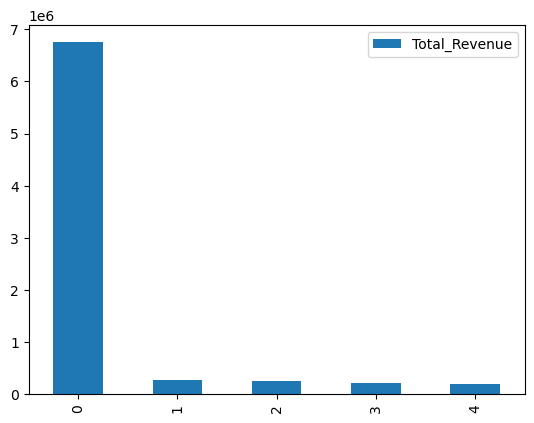

In [14]:
region_sale.plot(kind='bar')

In [15]:
H_cus=df.groupby('CustomerID')['Total_Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
H_cus

,CustomerID,Total_Revenue
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
5,14156.0,113214.59
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62690.54
9,15311.0,59284.19


In [16]:
M_product=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head().reset_index()
M_product

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
1,JUMBO BAG RED RETROSPOT,44963
2,ASSORTED COLOUR BIRD ORNAMENT,35215
3,WHITE HANGING HEART T-LIGHT HOLDER,34128
4,PACK OF 72 RETROSPOT CAKE CASES,33386


In [17]:
Df=df[~df['InvoiceNo'].str.contains('C')]
Df.shape

(392732, 9)

In [18]:
Df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Revenue'],
      dtype='object')

In [19]:
Df['CustomerID']=Df['CustomerID'].astype(str)
Df['InvoiceDate']=pd.to_datetime(Df['InvoiceDate'])

C:\Users\arnab\AppData\Local\Temp\ipykernel_17040\1150470160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['CustomerID']=Df['CustomerID'].astype(str)
C:\Users\arnab\AppData\Local\Temp\ipykernel_17040\1150470160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['InvoiceDate']=pd.to_datetime(Df['InvoiceDate'])


In [20]:
recent_date_of_order=Df['InvoiceDate'].max()
print('Most Recent Order',recent_date_of_order)
Df['R_order']=recent_date_of_order-Df['InvoiceDate']
Df

Most Recent Order 2011-12-09 12:50:00


C:\Users\arnab\AppData\Local\Temp\ipykernel_17040\4278033014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['R_order']=recent_date_of_order-Df['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue,R_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [21]:
recency=Df.groupby('CustomerID')['R_order'].min().reset_index()
recency.columns=['CustomerID','Recency']
recency['Recency']=recency['Recency'].dt.days
recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [22]:
frequency=Df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.rename(columns={'CustomerID':'CustomerID','InvoiceNo':'Frequency'},inplace=True)
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
monetary=Df.groupby('CustomerID')['Total_Revenue'].sum().reset_index()
monetary.rename(columns={'CustomerID':'CustomerID','Total_Revenue':'Monetary'},inplace=True)
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
Rfm=pd.merge(recency,frequency,on='CustomerID',how='inner')
Rfm=pd.merge(Rfm,monetary,on='CustomerID',how='inner')
Rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,721,2045.53


In [25]:
Rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   object 
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 169.5+ KB


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


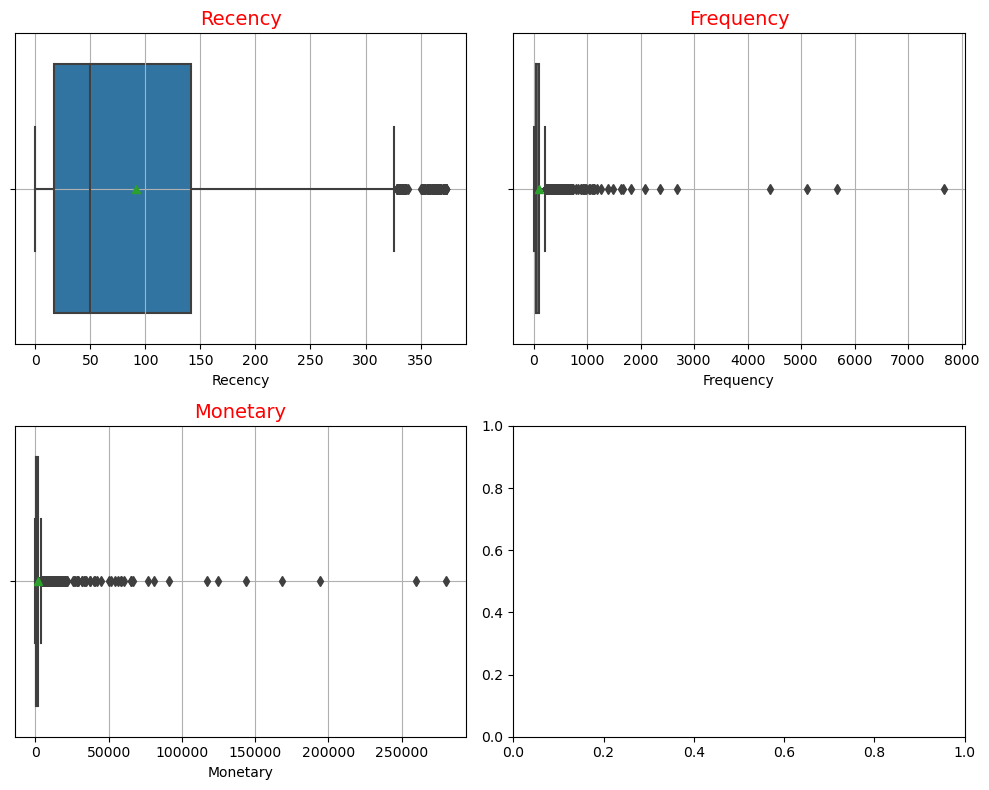

In [27]:
cols=Rfm.select_dtypes(exclude='object').columns.tolist()
fig,axes=plt.subplots(2,2,figsize=(10,8))
for i,ax in enumerate(axes.flatten()):
    if i>2:
        break
    sns.boxplot(data=Rfm,x=cols[i],ax=ax,showmeans=True)
    ax.set_title(cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()
plt.show()

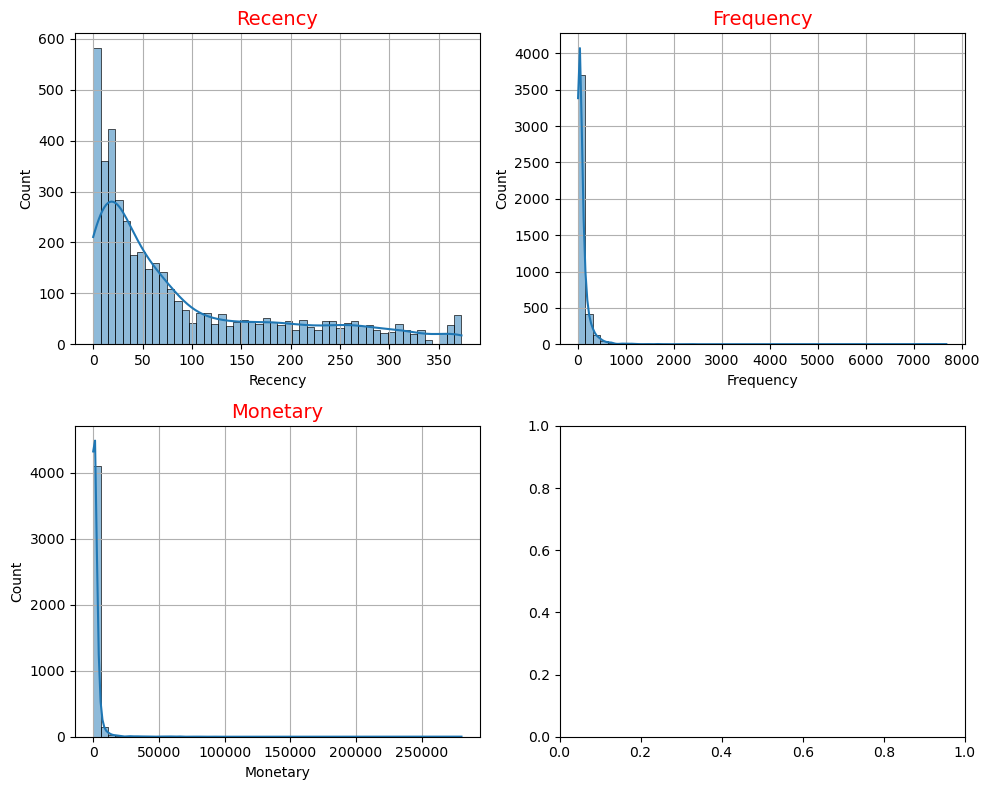

In [28]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
for i,ax in enumerate(axes.flatten()):
    if i>2:
        break
    sns.histplot(data=Rfm,x=cols[i],ax=ax,kde=True,bins=50)
    ax.set_title(cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()
plt.show()

In [29]:
def IQR_data(data):
    col=data.select_dtypes(exclude='object').columns.tolist()
    for i in col:
        q1=data[i].quantile(.25)
        q3=data[i].quantile(.75)
        IQR=q3-q1
        lower=q1-1.5*IQR
        upper=q3+1.5*IQR
        data=data.loc[(data[i]>=lower)&(data[i]<=upper)]
    return data

In [30]:
IQR_data(Rfm)

,CustomerID,Recency,Frequency,Monetary
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,85,2506.04
6,12353.0,203,4,89.00
...,...,...,...,...
4333,18278.0,73,9,173.90
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05


In [31]:
Rfm.drop(columns='CustomerID',inplace=True)

In [32]:
Rfm.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [33]:
Rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,91.518322,100.009747,0.0,17.000,50.00,141.000,373.00
Frequency,4339.0,90.512100,225.515328,1.0,17.000,41.00,98.000,7676.00
Monetary,4339.0,2048.215924,8984.248352,0.0,306.455,668.56,1660.315,280206.02


In [34]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Rfm=SC.fit_transform(Rfm)
Rfm

array([[ 2.33485829e+00, -3.96968210e-01,  8.36397668e+00],
       [-9.05199314e-01,  4.05730491e-01,  2.51778965e-01],
       [-1.75186336e-01, -2.63924227e-01, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -3.48185416e-01, -2.08184524e-01],
       [-8.85198958e-01,  2.79608740e+00, -2.98993684e-04],
       [-4.95192025e-01, -9.09670479e-02, -2.34811224e-02]])

In [35]:
Rfm=pd.DataFrame(Rfm,columns=['Recency','Frequency','Monetary'])
Rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,5.890144e-17,1.000115,-0.915199,-0.745196,-0.415191,0.494826,2.814867
Frequency,4339.0,-1.604309e-17,1.000115,-0.396968,-0.326011,-0.219576,0.033207,33.640118
Monetary,4339.0,-6.420516e-17,1.000115,-0.228005,-0.193891,-0.153582,-0.043181,30.964178


In [36]:
Rfm.head()

,Recency,Frequency,Monetary
0,2.334858,-0.396968,8.363977
1,-0.905199,0.405730,0.251779
2,-0.175186,-0.263924,-0.027938
3,-0.735196,-0.077663,-0.032357
4,2.174855,-0.326011,-0.190780


In [ ]:
from sklearn.cluster import KMeans
wcss=[]  
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=12,random_state=15)
    kmeans.fit(Rfm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss,marker='*')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
print('No of Optimal Clusters from Elbow method is expected to be 5')

In [ ]:
from sklearn.metrics import silhouette_score
s_score=[]  
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=12,random_state=15)
    kmeans.fit(Rfm)
    labels=kmeans.labels_
    s_avg=silhouette_score(Rfm,labels)
    s_score.append(s_avg)

plt.plot(range(2,15),s_score,marker='o',color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=12, random_state=15)
kmeans.fit(Rfm)
clusters=kmeans.predict(Rfm)
clusters

In [ ]:
Rfm['Clusters']=clusters
Rfm.head()

In [ ]:
Rfm[Rfm['Clusters']==0]

In [ ]:
Rfm['Clusters']=Rfm['Clusters'].astype('category')

In [ ]:
Rfm.Clusters.dtype

In [ ]:
clm=Rfm.columns
fig,axes=plt.subplots(2,2,figsize=(12,10))
for i,ax in enumerate(axes.flatten()):
    if i==3:
        break
    sns.boxplot(data=Rfm,x='Clusters',y=clm[i],showmeans=True,ax=ax)
    ax.set_title(f'Clusters wrt {clm[i]}',fontsize=13,color='blue')
    ax.set_xlabel('CLUSTERS')
    ax.set_ylabel(clm[i])
    ax.grid(True)
plt.tight_layout()
plt.show()